Main Project Machine Learning - Aleksandra Hryncyszyn, Radosław Dawidowski, Giacomo Magnocavallo

In [2]:
#import libraries for manipulation and visualization
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mglearn

#import libraries for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

#import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from umap import UMAP

#import libraries for evaluation
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


# Magic command for inline plotting in Jupyter notebooks
%matplotlib inline
# Set the figure DPI for better resolution
plt.rcParams['figure.dpi'] = 300

In [3]:
data = pd.read_csv('OnlineNewsPopularity.csv', header = 0)
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
#get rid of spaces
data.columns = data.columns.str.strip()

#get rid of columns redundant for the analysis - url and timedelta
data = data.iloc[:, 2:]

#get rid of an outlier detected in n_unique_tokens column
i = data[data['n_unique_tokens'] > 1].index
data = data.drop(i)

In [6]:
#make sure that the dataset it now suitable for the classification
pd.set_option('display.max_columns', None)
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,10.398784,546.488914,0.530547,0.970209,0.672796,10.883687,3.293469,4.542971,1.249905,4.548236,7.223772,0.052948,0.177989,0.157859,0.058598,0.185304,0.212572,26.107484,1153.961166,312.371221,13612.114774,752321.771813,259280.143039,1117.113731,5657.265804,3135.864283,3998.836211,10329.473218,6401.684395,0.168025,0.186389,0.187549,0.183311,0.143808,0.061877,0.069041,0.130918,0.184604,0.141259,0.216326,0.223775,0.234035,0.443381,0.119312,0.039626,0.016613,0.682167,0.287941,0.353834,0.095448,0.756747,-0.259531,-0.521957,-0.107503,0.282360,0.071427,0.341851,0.156068,3395.317004
std,2.114052,471.085404,0.137112,0.170012,0.154035,11.332160,3.855043,8.306262,4.107902,0.844416,1.909154,0.223932,0.382508,0.364613,0.234874,0.388549,0.409133,69.633960,3858.039075,620.791139,57986.741144,214504.348368,135103.478543,1137.452458,6098.939173,1318.166544,19738.912918,41028.061285,24211.637462,0.373893,0.389425,0.390356,0.386926,0.350900,0.240936,0.253527,0.337315,0.262976,0.219709,0.282147,0.295192,0.289185,0.116665,0.096930,0.017428,0.010828,0.190178,0.156151,0.104528,0.071314,0.247760,0.127721,0.290281,0.095373,0.324248,0.265453,0.188785,0.226296,11627.090592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.018182,0.018182,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470867,1.000000,0.625733,4.000000,1.000000,1.000000,0.000000,4.478403,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172843.750000,0.000000,3562.101631,2382.443334,639.000000,1100.000000,981.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396173,0.057762,0.028388,0.009615,0.600000,0.185185,0.306

In [7]:
#find a suitable threshold for label 'popular' or 'unpopular'
data['shares'].describe()

count     39643.000000
mean       3395.317004
std       11627.090592
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

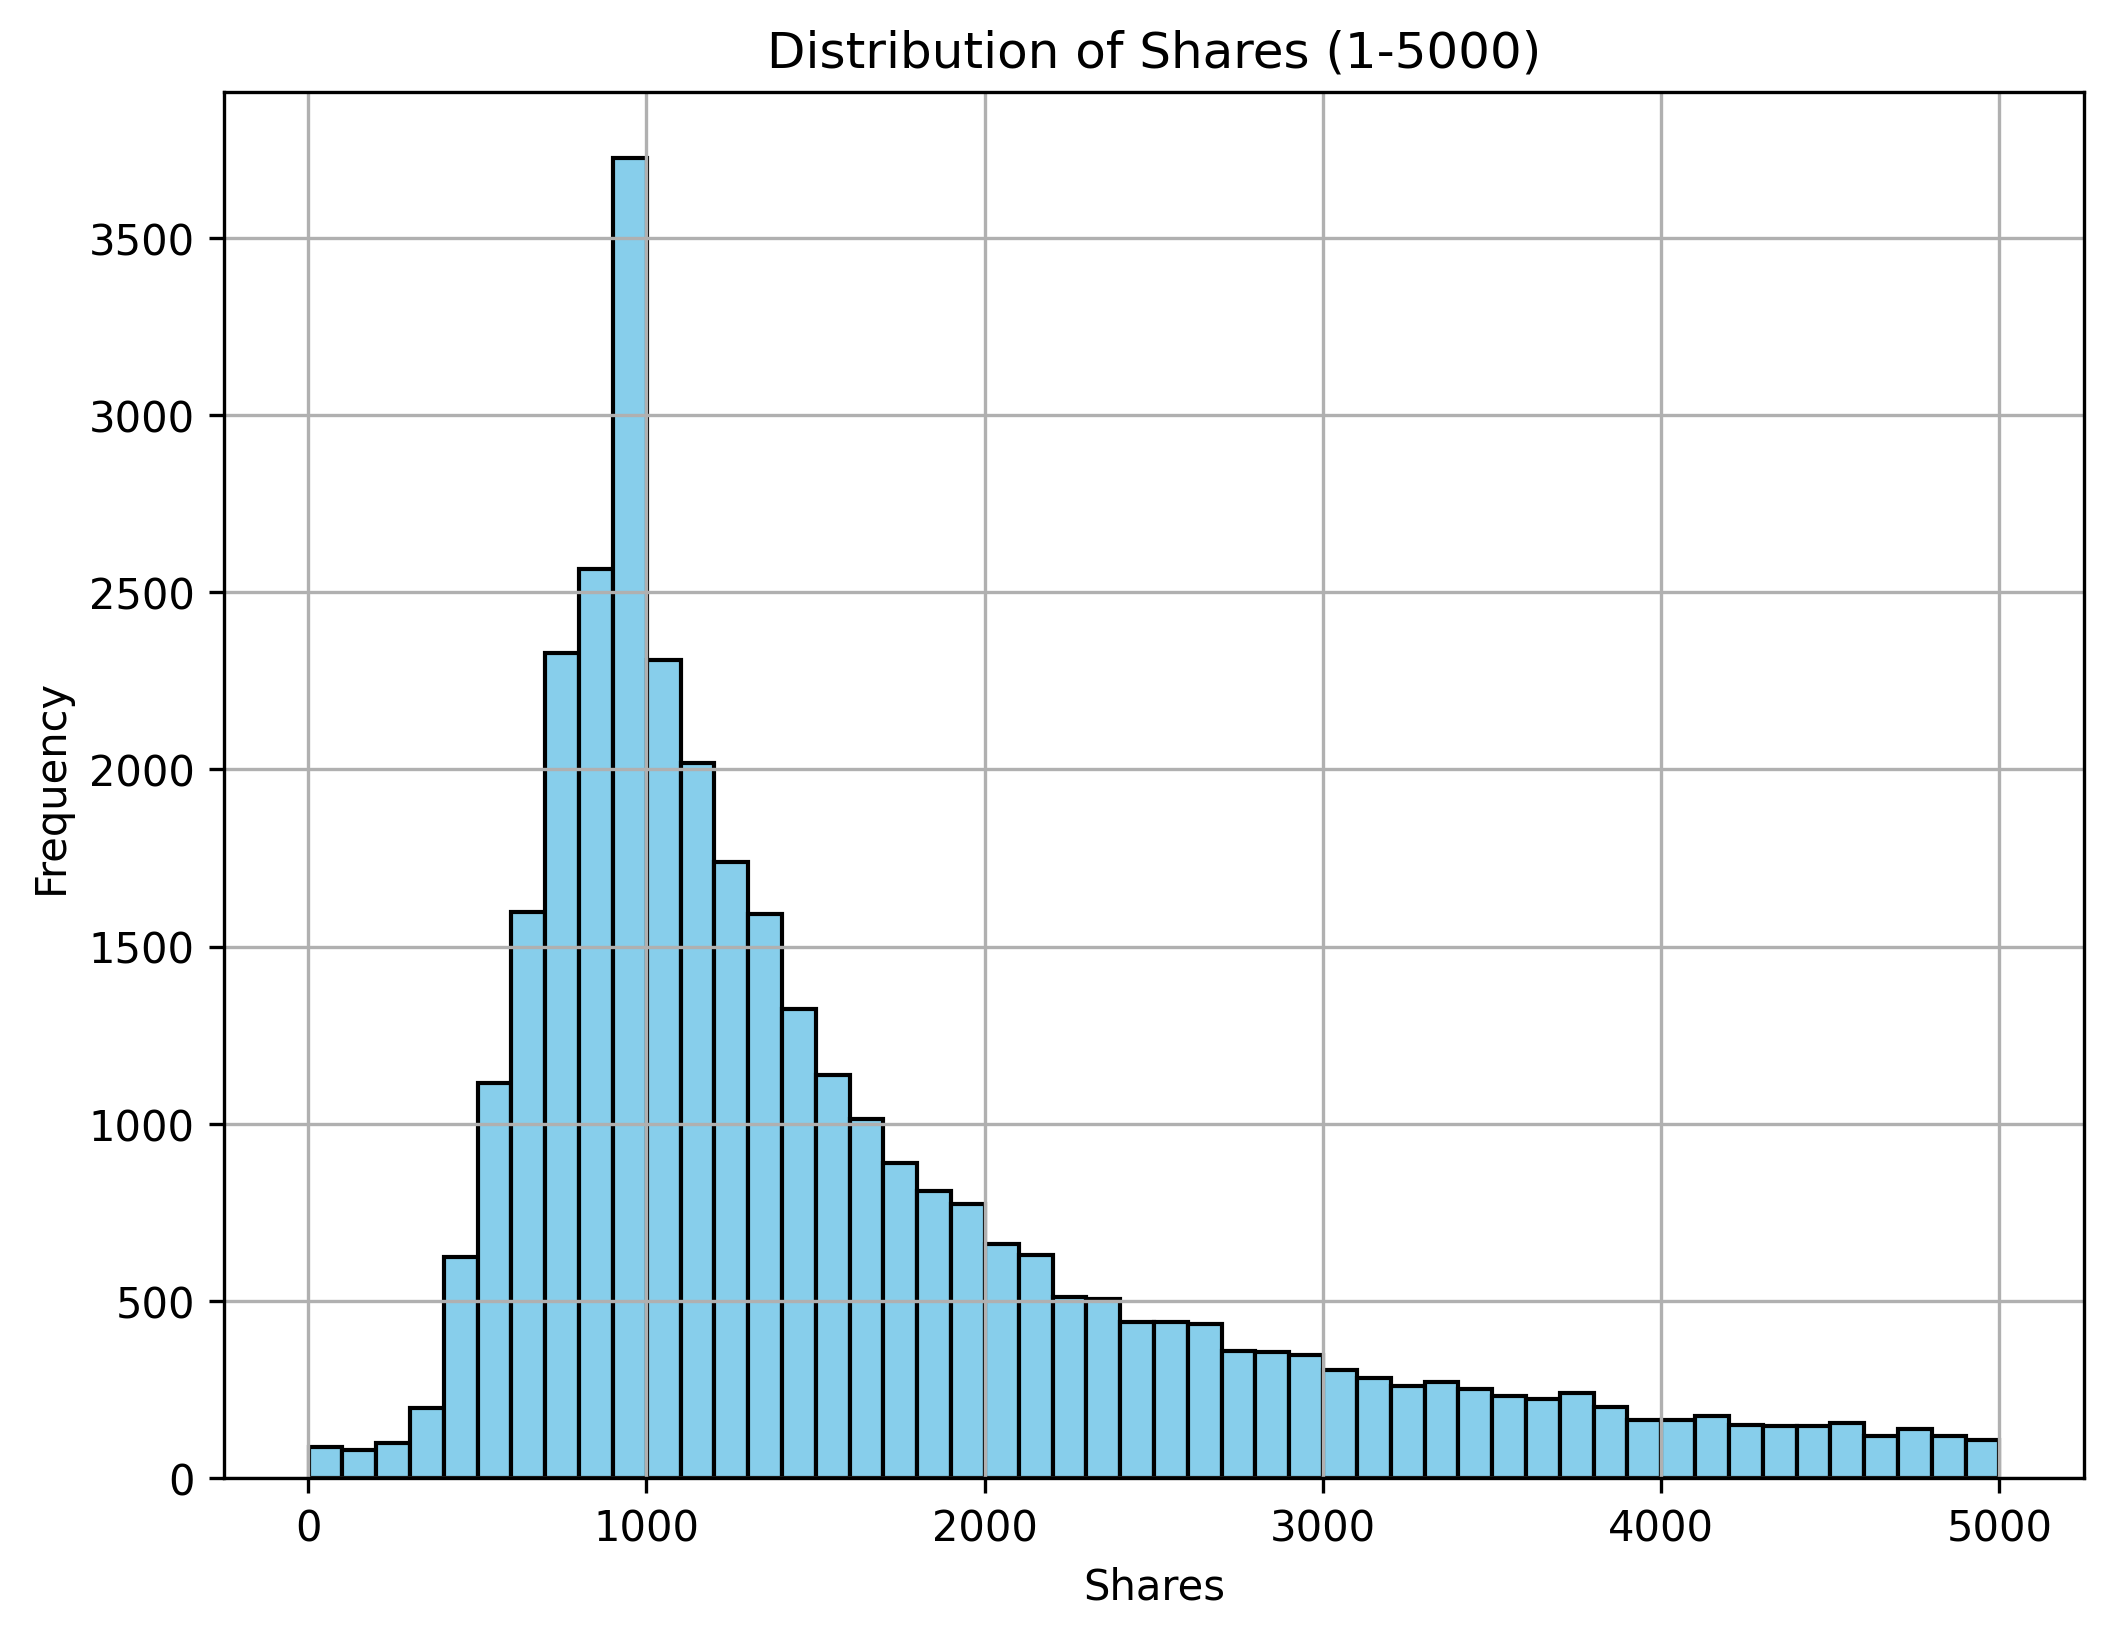

In [8]:
#ignore extreme values for the sake of graph readability
shares_range = data[(data['shares'] >= 1) & (data['shares'] <= 5000)]['shares']

plt.figure(figsize=(8, 6))
plt.hist(shares_range, bins=50, color='skyblue', edgecolor='black') 
plt.title('Distribution of Shares (1-5000)')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The target variable for this project is 'shares', which indicates the total number of shares of an article.

The purpose of this part of the project is to classify which articles will be popular. To do so, we first need to identify an appropriate popularity threshold. The above descriptive statistics for the variable 'shares' indicate 
1400 as the median value for this variable. Thus, the target variable 'shares' will be recoded into a binary variable using a threshold of 1400 shares. In other words, articles with a share value equal to or greater than 1400 will be labeled as 'popular' (1), and those with fewer than 1400 shares as 'unpopular' (0).

In [9]:
#create a new binary column 'popular' and showing classess frequency 
data['popular_article'] = (data['shares'] >= 1400).astype(int)
data['popular_article'].value_counts()

popular_article
1    21153
0    18490
Name: count, dtype: int64

As the classes frequency is quite similar, the dataset can be considered as balanced, therefore accuracy score will be an appropriate evaluation metric.

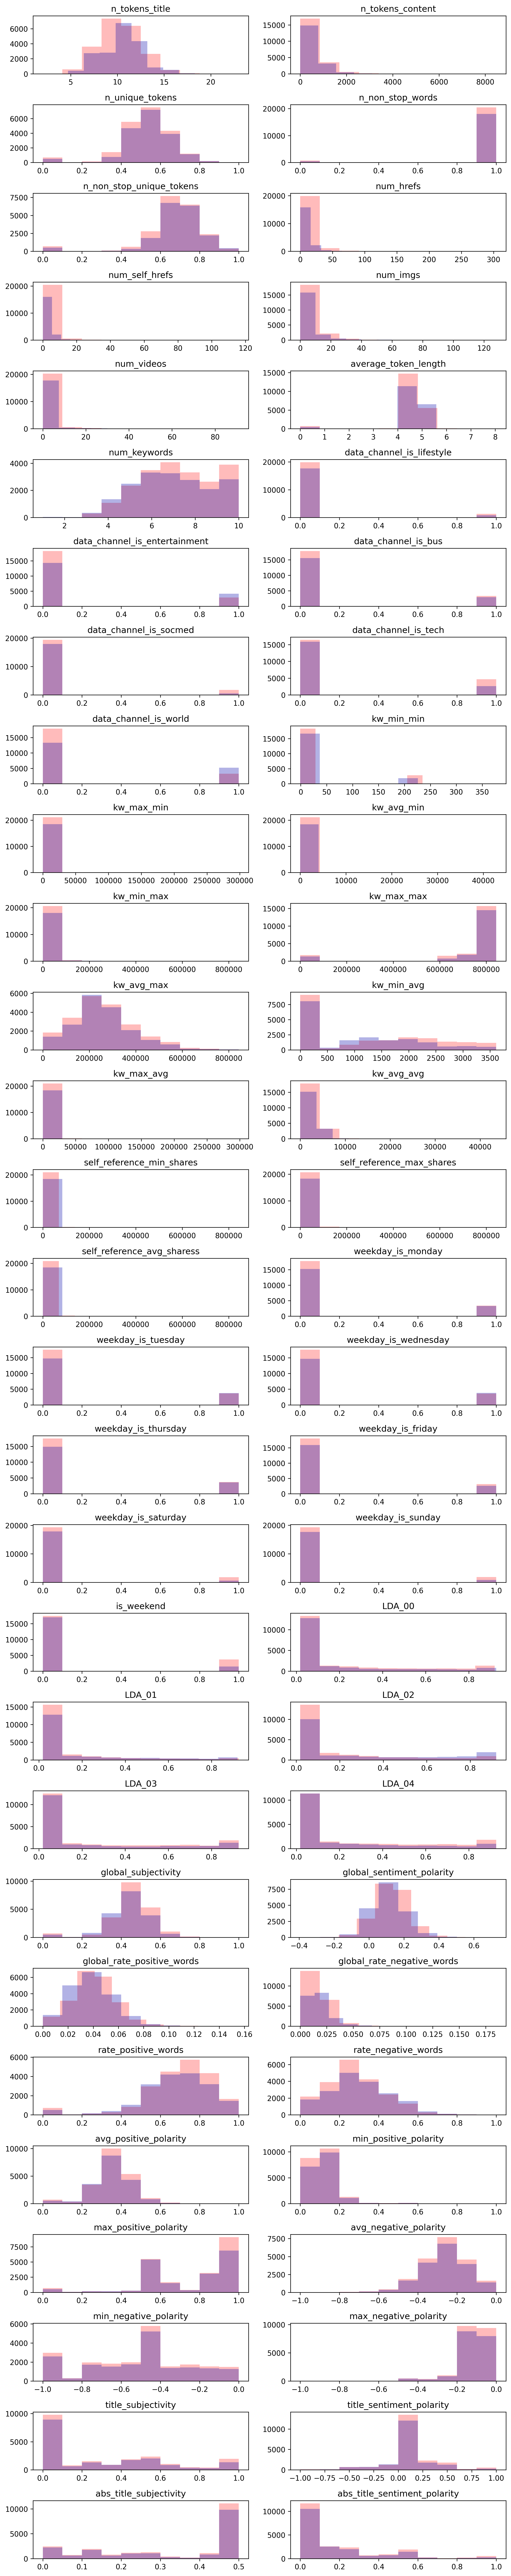

In [9]:
#compare the distribution of each variable values for both popular articles (in red) and unpopular (in blue)
popular = data[data['shares'] >= 1400]
nonpopular = data[data['shares'] < 1400]
column_names = data.columns
num_plots = len(column_names)

fig, axes = plt.subplots(29, 2, figsize=(10, 50))
axes = axes.flatten()

for i in range(num_plots-2):
    axes[i].hist(popular.iloc[:, i], color=mglearn.cm3(1), alpha=.3) 
    axes[i].hist(nonpopular.iloc[:, i], color=mglearn.cm3(0), alpha=.3)
    axes[i].set_title(f'{column_names[i]}')

plt.tight_layout()

Those histograms plot the values for the data that is classified as popular in red, and for those that are classified as unpopular in blue. The purple parts result from the overlap of both. The aim of this visualization was to distinguish which variables are correlated with the popularity of the articles. As most of the graphs are dominated by purple colour, we can conclude that the differences between popular and unpopular articles aren't strong, but a slightly different distribution can be observed for n_tokens_title, num_hrefs, num_self_hrefs, num_imgs, num_keywords, data_channel_is_entertainment, data_channel_is_world, kw_min_min, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words. Morevoer, a subtle difference is also in the distribution of n_tokens_content, num_videos, kw_min_avg, self_refernce_min_shares, and self_reference_avg_sharess.

# CLASSIFICATION MODELS USING ALL FEATURES 

In [10]:
#extract the target variable
target_index = data.columns.get_loc('popular_article')
y_all = data.iloc[:, target_index]

#extract the features, dropping the target variable and the non-predictive feature contained in the dataset
X_all = data.drop(columns=['popular_article', 'shares'])  

#split the data into training and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [11]:
X_all.shape

(39643, 58)

In [12]:
#apply MinMaxScaler to the data
minmax = MinMaxScaler()
X_train_minmax_all = minmax.fit_transform(X_train_all)
X_test_minmax_all = minmax.transform(X_test_all)

In [13]:
#apply StandardScaler to the data
standard = StandardScaler()
X_train_stand_all = standard.fit_transform(X_train_all)
X_test_stand_all = standard.transform(X_test_all)


In [14]:
import warnings
warnings.filterwarnings('ignore')

#create a pipeline with preprocessing and classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(max_iter=100000))])

#define the parameter grid to search
param_grid = {
    'preprocessing': [StandardScaler()],
    'classifier__C': np.logspace(-3, 0, 14)
} #, MinMaxScaler(), None

#perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_all, y_train_all)

#display the best parameters and scores
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: ", grid.best_score_)
print("Test set score: ", grid.score(X_test_all, y_test_all))


Best parameters: {'classifier__C': 0.3455107294592222, 'preprocessing': StandardScaler()}
Best cross-validation score:  0.6563663597060166
Test set score:  0.6469920544835415


In [15]:
#create a pipeline with preprocessing and classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(dual=False, max_iter=10000))])

#define the parameter grid to search
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), None],
    'classifier__C': np.logspace(-3, 0, 14)
}

#perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_all, y_train_all)

#display the best parameters and scores
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test_all, y_test_all)))

Best parameters: {'classifier__C': 0.0028942661247167516, 'preprocessing': StandardScaler()}
Best cross-validation score: 0.66
Test set score: 0.65


In [16]:
#create a pipeline with preprocessing and classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

#define the parameter grid to search (for k from 1 to 100)
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), None],
    'classifier__n_neighbors': list(range(1, 101))
}

#perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_all, y_train_all)

#display best parameters and scores
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test_all, y_test_all)))

Best parameters:  {'classifier__n_neighbors': 91, 'preprocessing': StandardScaler()}
Best cross-validation score: 0.64
Test set score: 0.64


In [17]:
#train Random Forest on all features
rf_all = RandomForestClassifier(warm_start=True, max_depth=9, max_features=21, n_estimators=20 )
rf_all.fit(X_train_stand_all, y_train_all)
print('Random Forest accuracy on test set: ', rf_all.score(X_test_stand_all, y_test_all))
print('Random Forest accuracy on train set: ', rf_all.score(X_train_stand_all, y_train_all))

#calculate the proportion of '1's in the target variable
targetlist_all = list(y_test_all)
print("Proportion of '1's in the test set: ", targetlist_all.count(1)/len(targetlist_all))

Random Forest accuracy on test set:  0.6579644343548997
Random Forest accuracy on train set:  0.7353850034684997
Proportion of '1's in the test set:  0.5260436372808677


In [18]:
#set up the parameter grid for grid search
param_grid_all = {
    'max_depth': list(range(1, 15)),
    'max_features': list(range(2, 24)),
    'n_estimators': list(range(20, 21))  # You can expand this range as desired
}

#grid search with cross-validation
grid_all = GridSearchCV(RandomForestClassifier(warm_start=True), param_grid_all, cv=5)
grid_all.fit(X_train_all, y_train_all)

#display the best parameters and scores
print("Best parameters for all features: {}".format(grid_all.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_all.best_score_))
print("Test set score: {:.2f}".format(grid_all.score(X_test_all, y_test_all)))

Best parameters for all features: {'max_depth': 11, 'max_features': 17, 'n_estimators': 20}
Best cross-validation score: 0.67
Test set score: 0.66


# CLASSIFICATION USING SELECTED FEATURES

Subsequently, to prepare the data, we are going to extract the target into a different dataframe than features, and then divide the data into test and train sets:

In [19]:
#run the model with statsmodels to get p-values
X_with_constant = sm.add_constant(X_train_all)
model = sm.OLS(y_train_all, X_with_constant)
results = model.fit()

#display the summary to view p-values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        popular_article   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     83.05
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:57:13   Log-Likelihood:                -20800.
No. Observations:               31714   AIC:                         4.171e+04
Df Residuals:                   31658   BIC:                         4.218e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [21]:
param_grid = {
    'max_depth': list(range(2, 20)),
    'max_features': list(range(1, 24)) 
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train_all, y_train_all)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test_all, y_test_all)))

tree = DecisionTreeClassifier(max_depth = 6, max_features = 23)
tree.fit(X_train_all, y_train_all)
tree_dot = export_graphviz(tree, out_file=None, feature_names=data.columns[:-2])
print(tree_dot)

Best parameters: {'max_depth': 6, 'max_features': 21}
Best cross-validation score: 0.64
Test set score: 0.64
digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="kw_avg_avg <= 2837.703\ngini = 0.497\nsamples = 31714\nvalue = [14732, 16982]"] ;
1 [label="is_weekend <= 0.5\ngini = 0.492\nsamples = 15266\nvalue = [8582, 6684]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="LDA_04 <= 0.284\ngini = 0.485\nsamples = 13578\nvalue = [7983.0, 5595.0]"] ;
1 -> 2 ;
3 [label="kw_max_avg <= 3749.952\ngini = 0.462\nsamples = 8745\nvalue = [5573, 3172]"] ;
2 -> 3 ;
4 [label="kw_min_min <= 209.0\ngini = 0.429\nsamples = 5450\nvalue = [3751.0, 1699.0]"] ;
3 -> 4 ;
5 [label="self_reference_min_shares <= 1550.0\ngini = 0.402\nsamples = 4511\nvalue = [3256, 1255]"] ;
4 -> 5 ;
6 [label="gini = 0.371\nsamples = 3364\nvalue = [2535, 829]"] ;
5 -> 6 ;
7 [label="gini = 0.467\nsamples = 1147\nvalue = [721, 426]"] ;
5 -> 7 ;
8 [label="self_re

In [22]:
#group features
significant_features = ['n_tokens_title', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'average_token_length', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_world', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_sentiment_polarity', 'global_subjectivity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']

# create feature matrix (X) and target vector (y)
X = data[significant_features]
y = data['popular_article']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we're going to apply MinMaxScaler and then StandardScaler and investigate their influcence on the data:

In [23]:
#apply MinMaxScaler to the data
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

print("Pre-transformed shape was {}".format(X_train.shape), "and transformed shape is {}".format(X_train_minmax.shape)) 
print("First 5 feature's minimums before scaling:\n{}".format(X_train.min(axis=0)[:5])) 
print("First 5 feature's maximums before scaling:\n{}".format(X_train.max(axis=0)[:5])) 
print("First 5 feature's minimums after scaling:\n{}".format(X_train_minmax.min(axis=0)[:5]))
print("First 5 feature's maximums after scaling:\n{}".format(X_train_minmax.max(axis=0)[:5]))

Pre-transformed shape was (31714, 47) and transformed shape is (31714, 47)
First 5 feature's minimums before scaling:
n_tokens_title              2.0
n_unique_tokens             0.0
n_non_stop_unique_tokens    0.0
n_tokens_content            0.0
num_hrefs                   0.0
dtype: float64
First 5 feature's maximums before scaling:
n_tokens_title                23.0
n_unique_tokens                1.0
n_non_stop_unique_tokens       1.0
n_tokens_content            8474.0
num_hrefs                    304.0
dtype: float64
First 5 feature's minimums after scaling:
[0. 0. 0. 0. 0.]
First 5 feature's maximums after scaling:
[1. 1. 1. 1. 1.]


In [24]:
#apply StandardScaler to the data
standard = StandardScaler()
X_train_stand = standard.fit_transform(X_train)
X_test_stand = standard.transform(X_test)

print("Pre-transformed shape was {}".format(X_train.shape), "and transformed shape is {}".format(X_train_stand.shape)) 
print("First 5 feature's minimums before scaling:\n{}".format(X_train.min(axis=0)[:5])) 
print("First 5 feature's maximums before scaling:\n{}".format(X_train.max(axis=0)[:5])) 
print("First 5 feature's minimums after scaling:\n{}".format(X_train_stand.min(axis=0)[:5]))
print("First 5 feature's maximums after scaling:\n{}".format(X_train_stand.max(axis=0)[:5]))

Pre-transformed shape was (31714, 47) and transformed shape is (31714, 47)
First 5 feature's minimums before scaling:
n_tokens_title              2.0
n_unique_tokens             0.0
n_non_stop_unique_tokens    0.0
n_tokens_content            0.0
num_hrefs                   0.0
dtype: float64
First 5 feature's maximums before scaling:
n_tokens_title                23.0
n_unique_tokens                1.0
n_non_stop_unique_tokens       1.0
n_tokens_content            8474.0
num_hrefs                    304.0
dtype: float64
First 5 feature's minimums after scaling:
[-3.96749475 -3.89345037 -4.39909333 -1.16502379 -0.9593599 ]
First 5 feature's maximums after scaling:
[ 5.9492915   3.44641841  2.1379504  16.83496933 25.76629826]


In [25]:
X.head()

,n_tokens_title,n_unique_tokens,n_non_stop_unique_tokens,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,average_token_length,num_keywords,data_channel_is_entertainment,data_channel_is_world,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,weekday_is_tuesday,weekday_is_wednesday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,min_positive_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
0,12.0,0.663594,0.815385,219.0,4.0,2.0,1.0,4.680365,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.092562,0.521617,0.045662,0.013699,0.769231,0.230769,0.100000,0.500000,-0.187500,0.000000,496.0,496.0,496.000000
1,9.0,0.604743,0.791946,255.0,3.0,1.0,1.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.148948,0.341246,0.043137,0.015686,0.733333,0.266667,0.033333,0.000000,0.000000,0.500000,0.0,0.0,0.000000
2,9.0,0.575130,0.663866,211.0,3.0,1.0,1.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.323333,0.702222,0.056872,0.009479,0.857143,0.142857,0.100000,0.000000,0.000000,0.500000,918.0,918.0,918.000000
3,9.0,0.503788,0.665635,531.0,9.0,0.0,1.0,4.404896,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.100705,0.429850,0.041431,0.020716,0.666667,0.333333,0.136364,0.000000,0.000000,0.500000,0.0,0.0,0.000000
4,13.0,0.415646,0.540890,1072.0,19.0,19.0,20.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.281003,0.513502,0.074627,0.012127,0.860215,0.139785,0.033333,0.454545,0.136364,0.045455,545.0,16000.0,3151.157895


In [26]:
#create a pipeline with preprocessing and classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(max_iter=10000))])

#define the parameter grid to search
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), None],
    'classifier__C': np.logspace(-3, 0, 14)
}

#perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#display the best parameters and scores
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: ", grid.best_score_)
print("Test set score: ", grid.score(X_test, y_test))

Best parameters: {'classifier__C': 0.3455107294592222, 'preprocessing': StandardScaler()}
Best cross-validation score:  0.655420440036427
Test set score:  0.6483793668810695


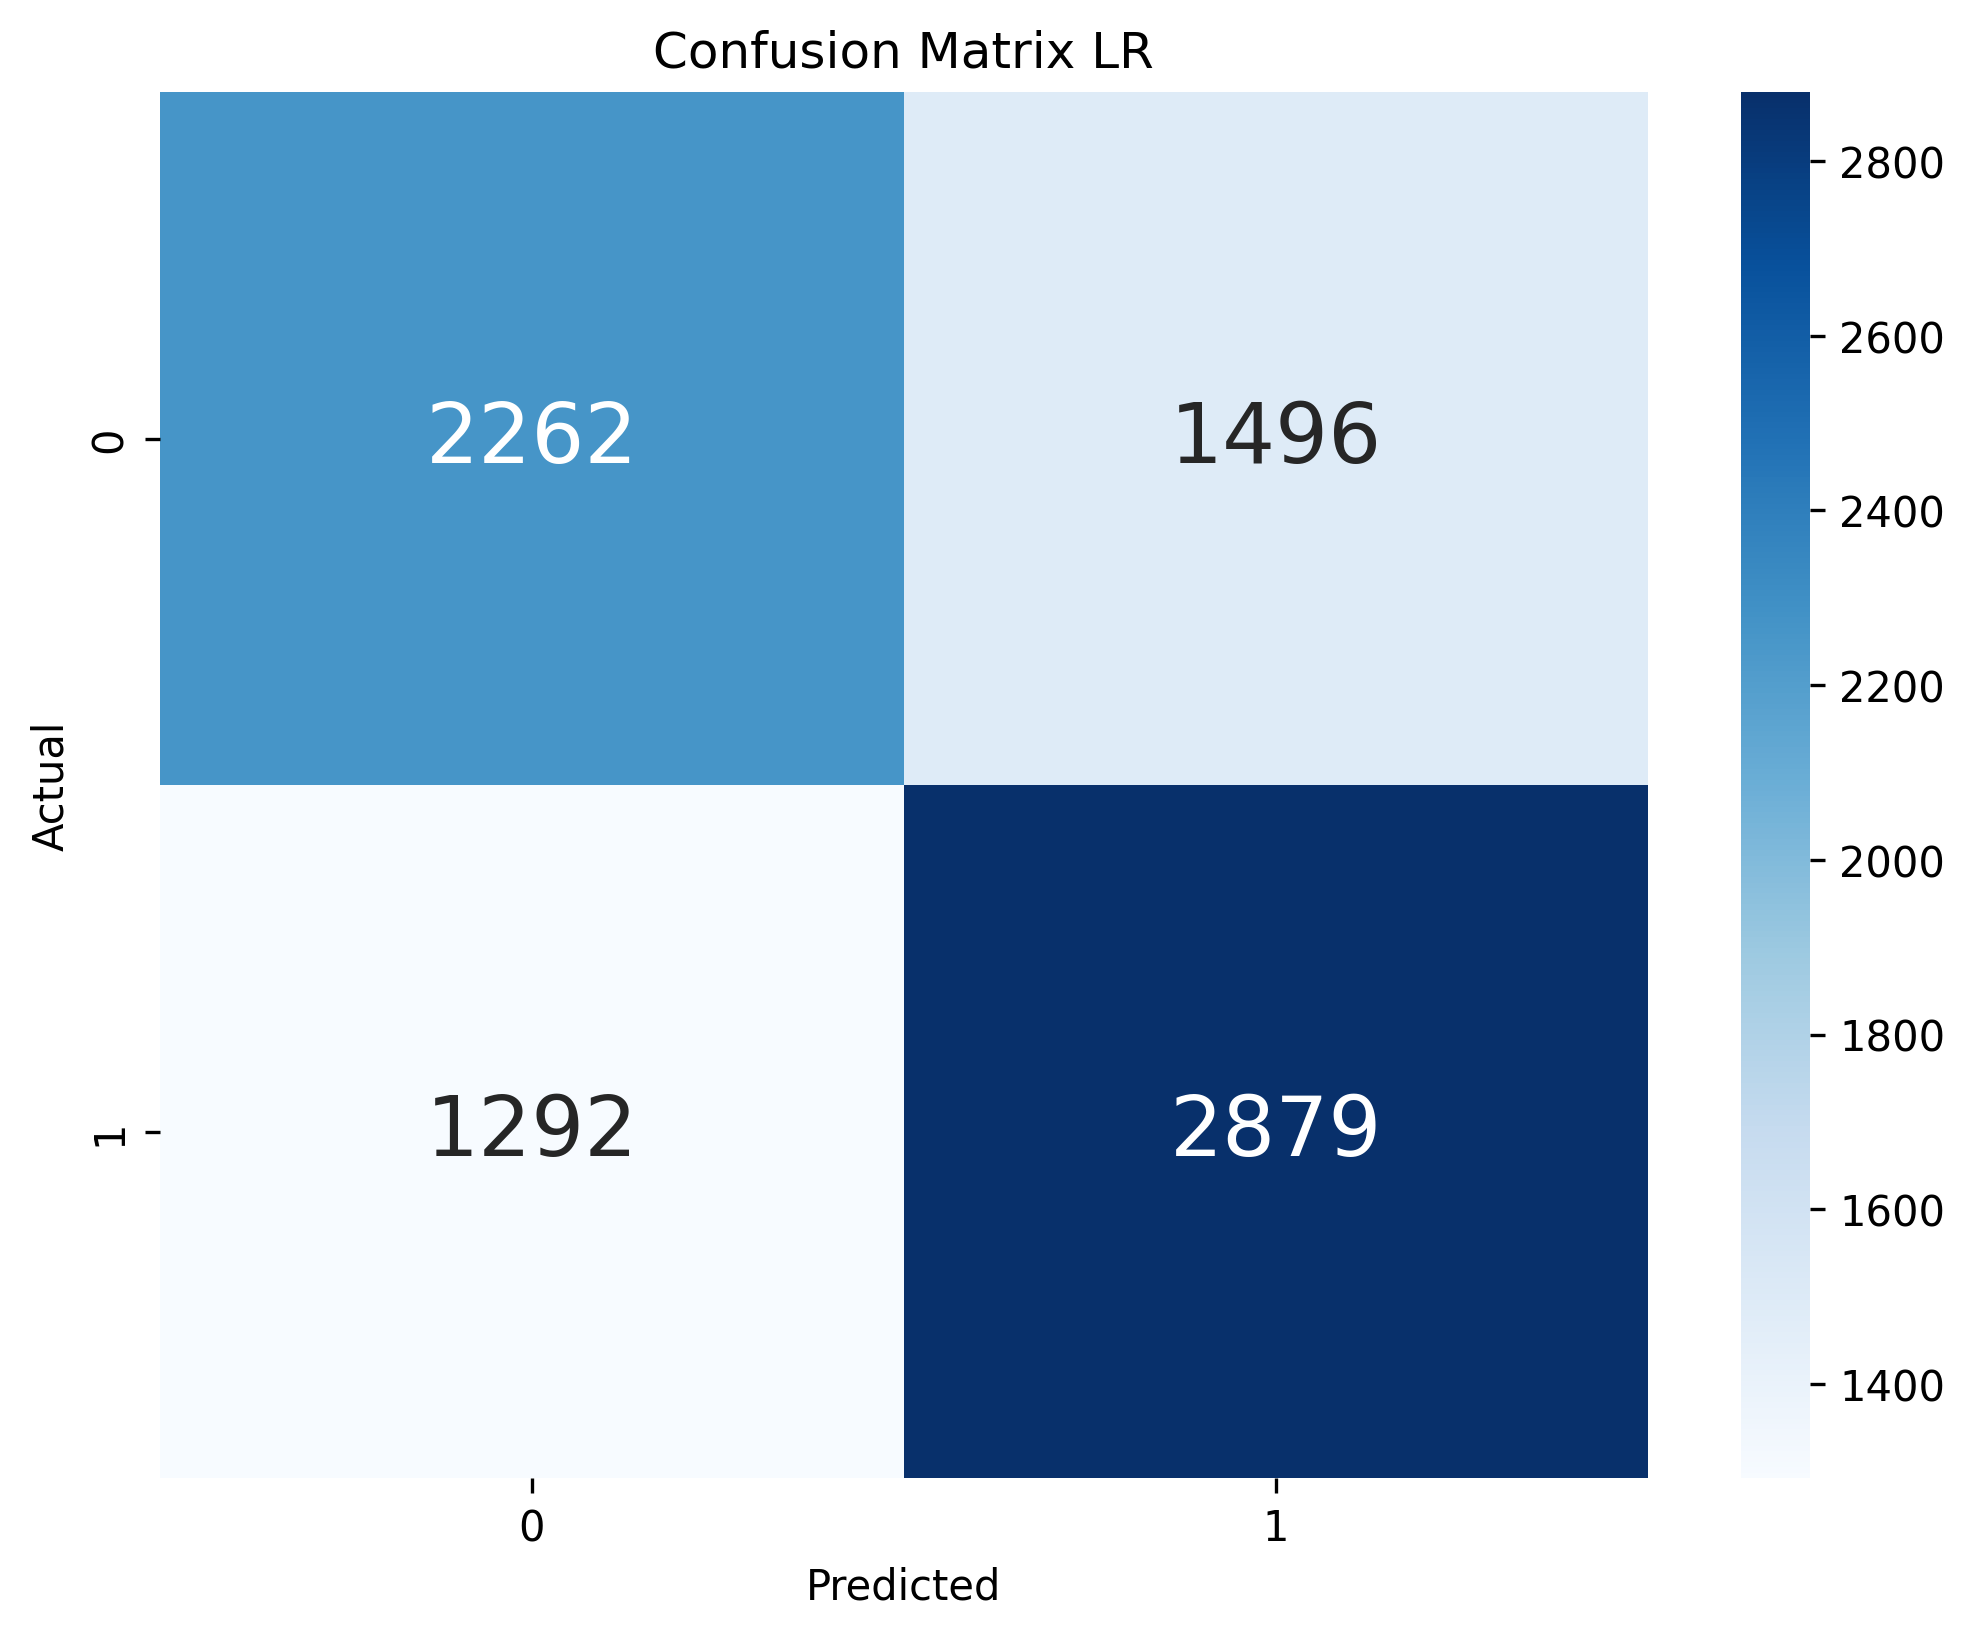

In [27]:
lr = LogisticRegression(max_iter=10000, C = 0.3455107294592222 )
lr.fit(X_train_stand, y_train)

cm = confusion_matrix(y_test, lr.predict(X_test_stand))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),annot_kws={"fontsize": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LR')
plt.show()

In [28]:
#create a pipeline with preprocessing and classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(dual=False, max_iter=10000))])

#define the parameter grid to search
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), None], 
    'classifier__C': np.logspace(-3, 0, 14)
}

#perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#display the best parameters and scores
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

Best parameters: {'classifier__C': 0.008376776400682925, 'preprocessing': StandardScaler()}
Best cross-validation score: 0.65
Test set score: 0.65


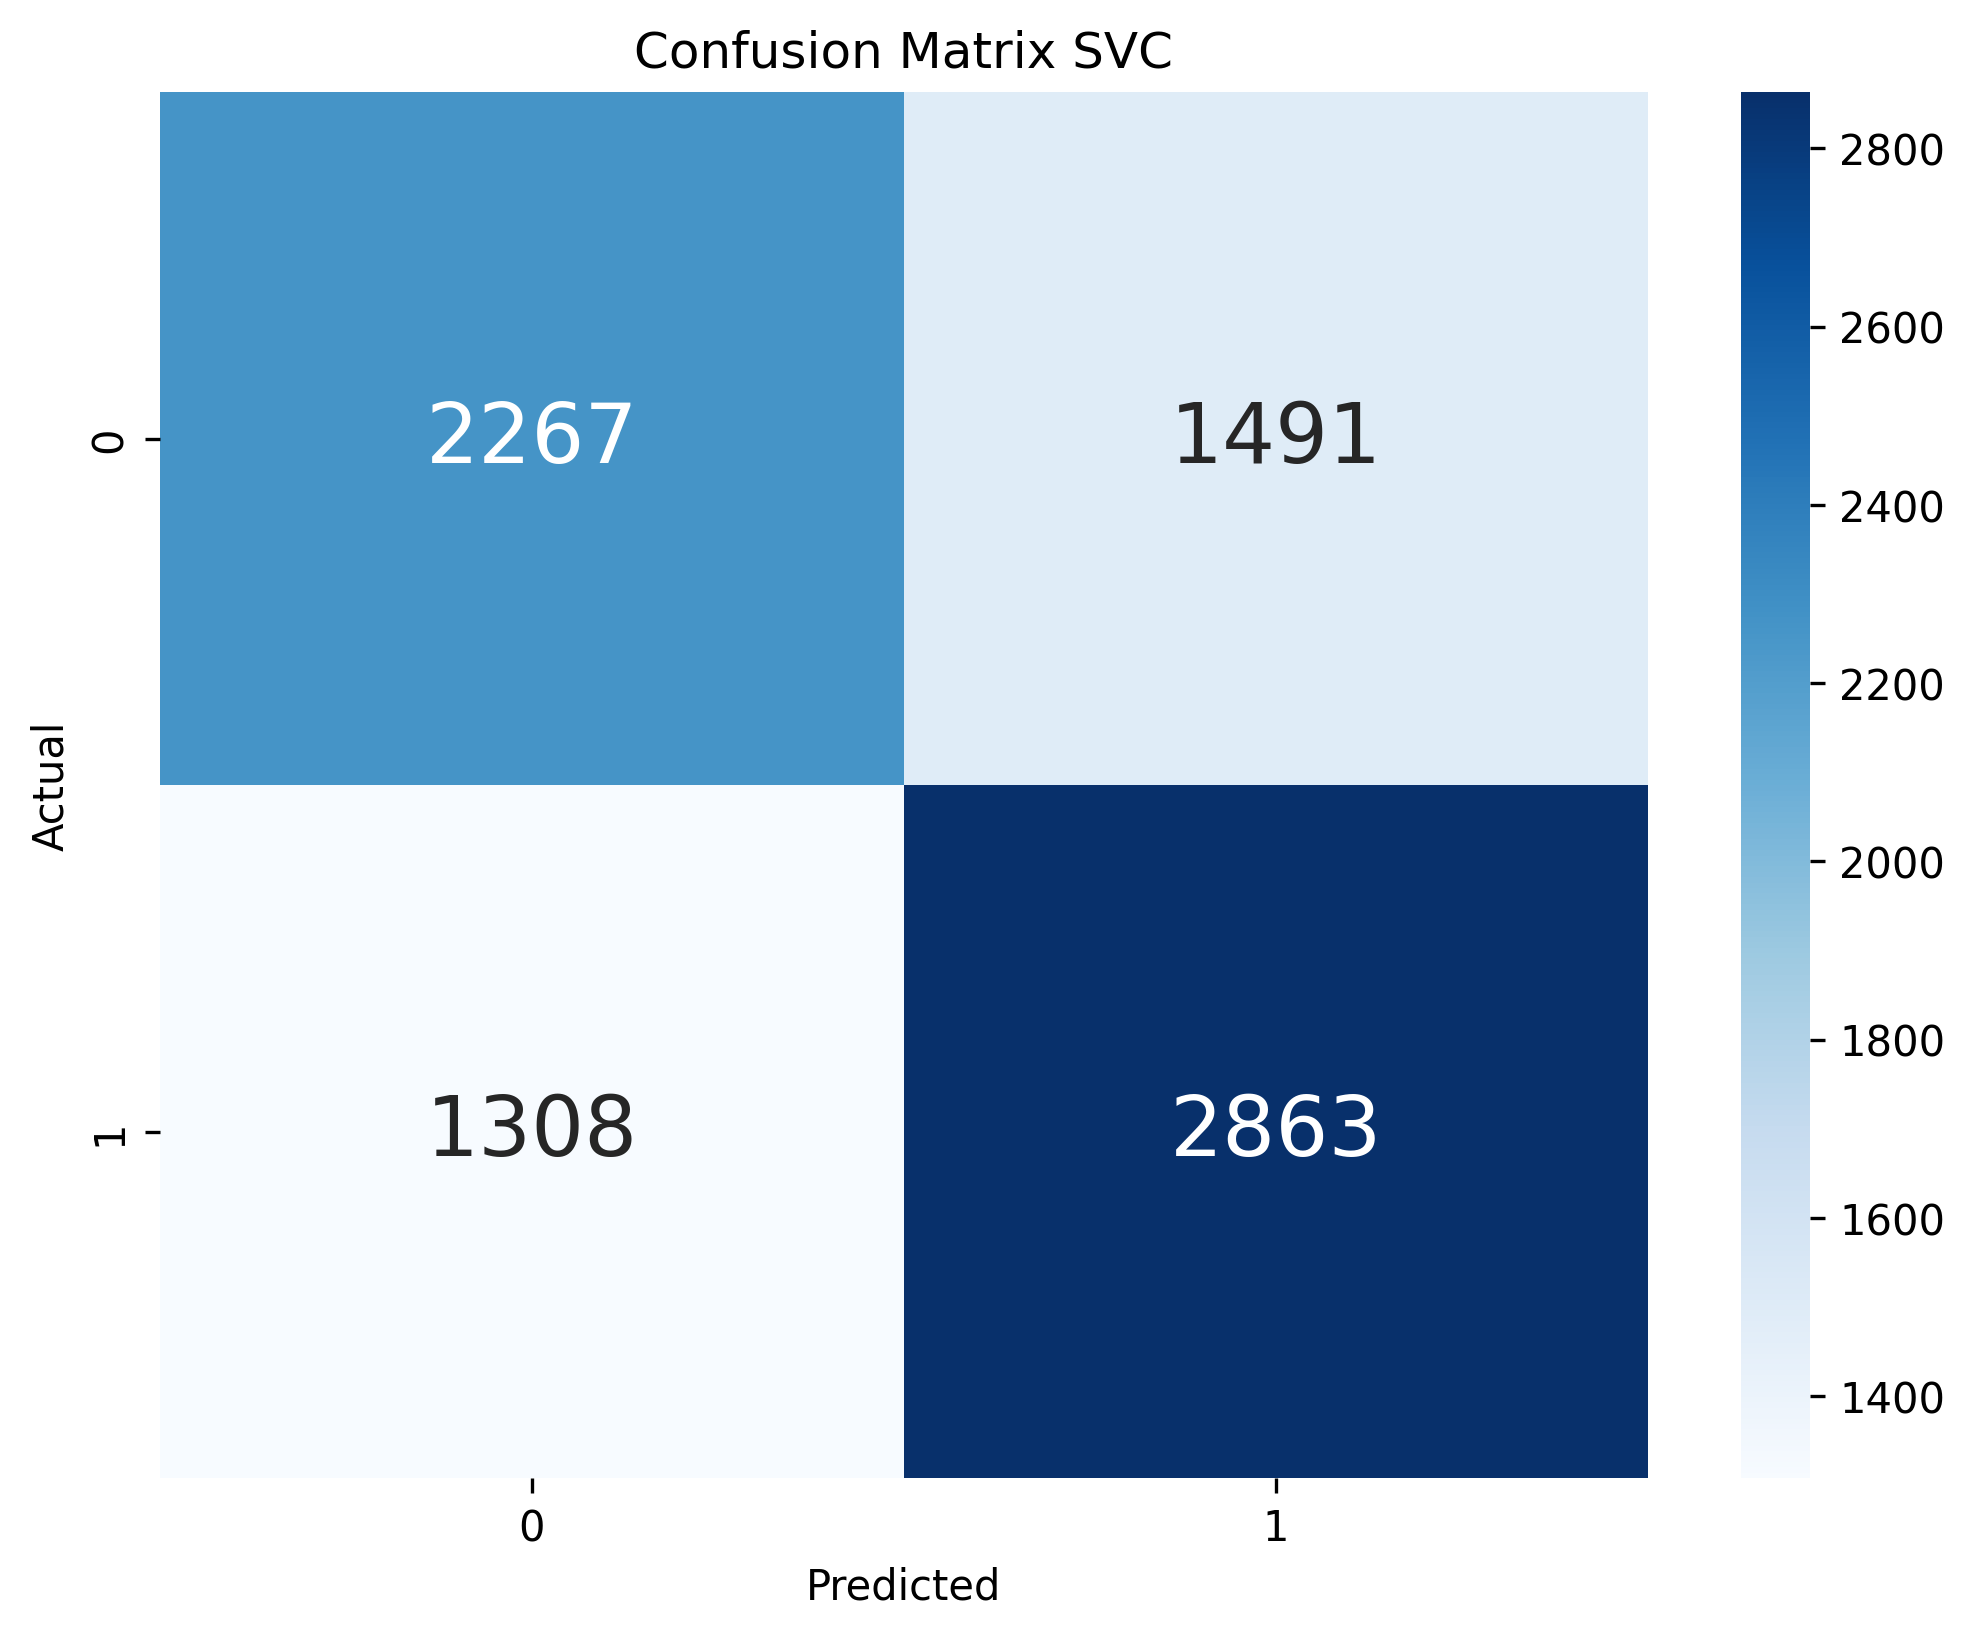

In [29]:
svc = LinearSVC(dual=False, max_iter=10000)
svc.fit(X_train_stand,y_train)
svc.score(X_train_stand, y_train)

cm = confusion_matrix(y_test, svc.predict(X_test_stand))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),annot_kws={"fontsize": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC')
plt.show()

In [30]:
#create a pipeline with preprocessing and classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

#define the parameter grid to search (for k from 1 to 100)
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), None],
    'classifier__n_neighbors': list(range(1, 100))
}

#perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#display the best parameters and scores
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ".format(grid.best_score_))
print("Test set score: ".format(grid.score(X_test, y_test)))

Best parameters:  {'classifier__n_neighbors': 59, 'preprocessing': StandardScaler()}
Best cross-validation score: 
Test set score: 


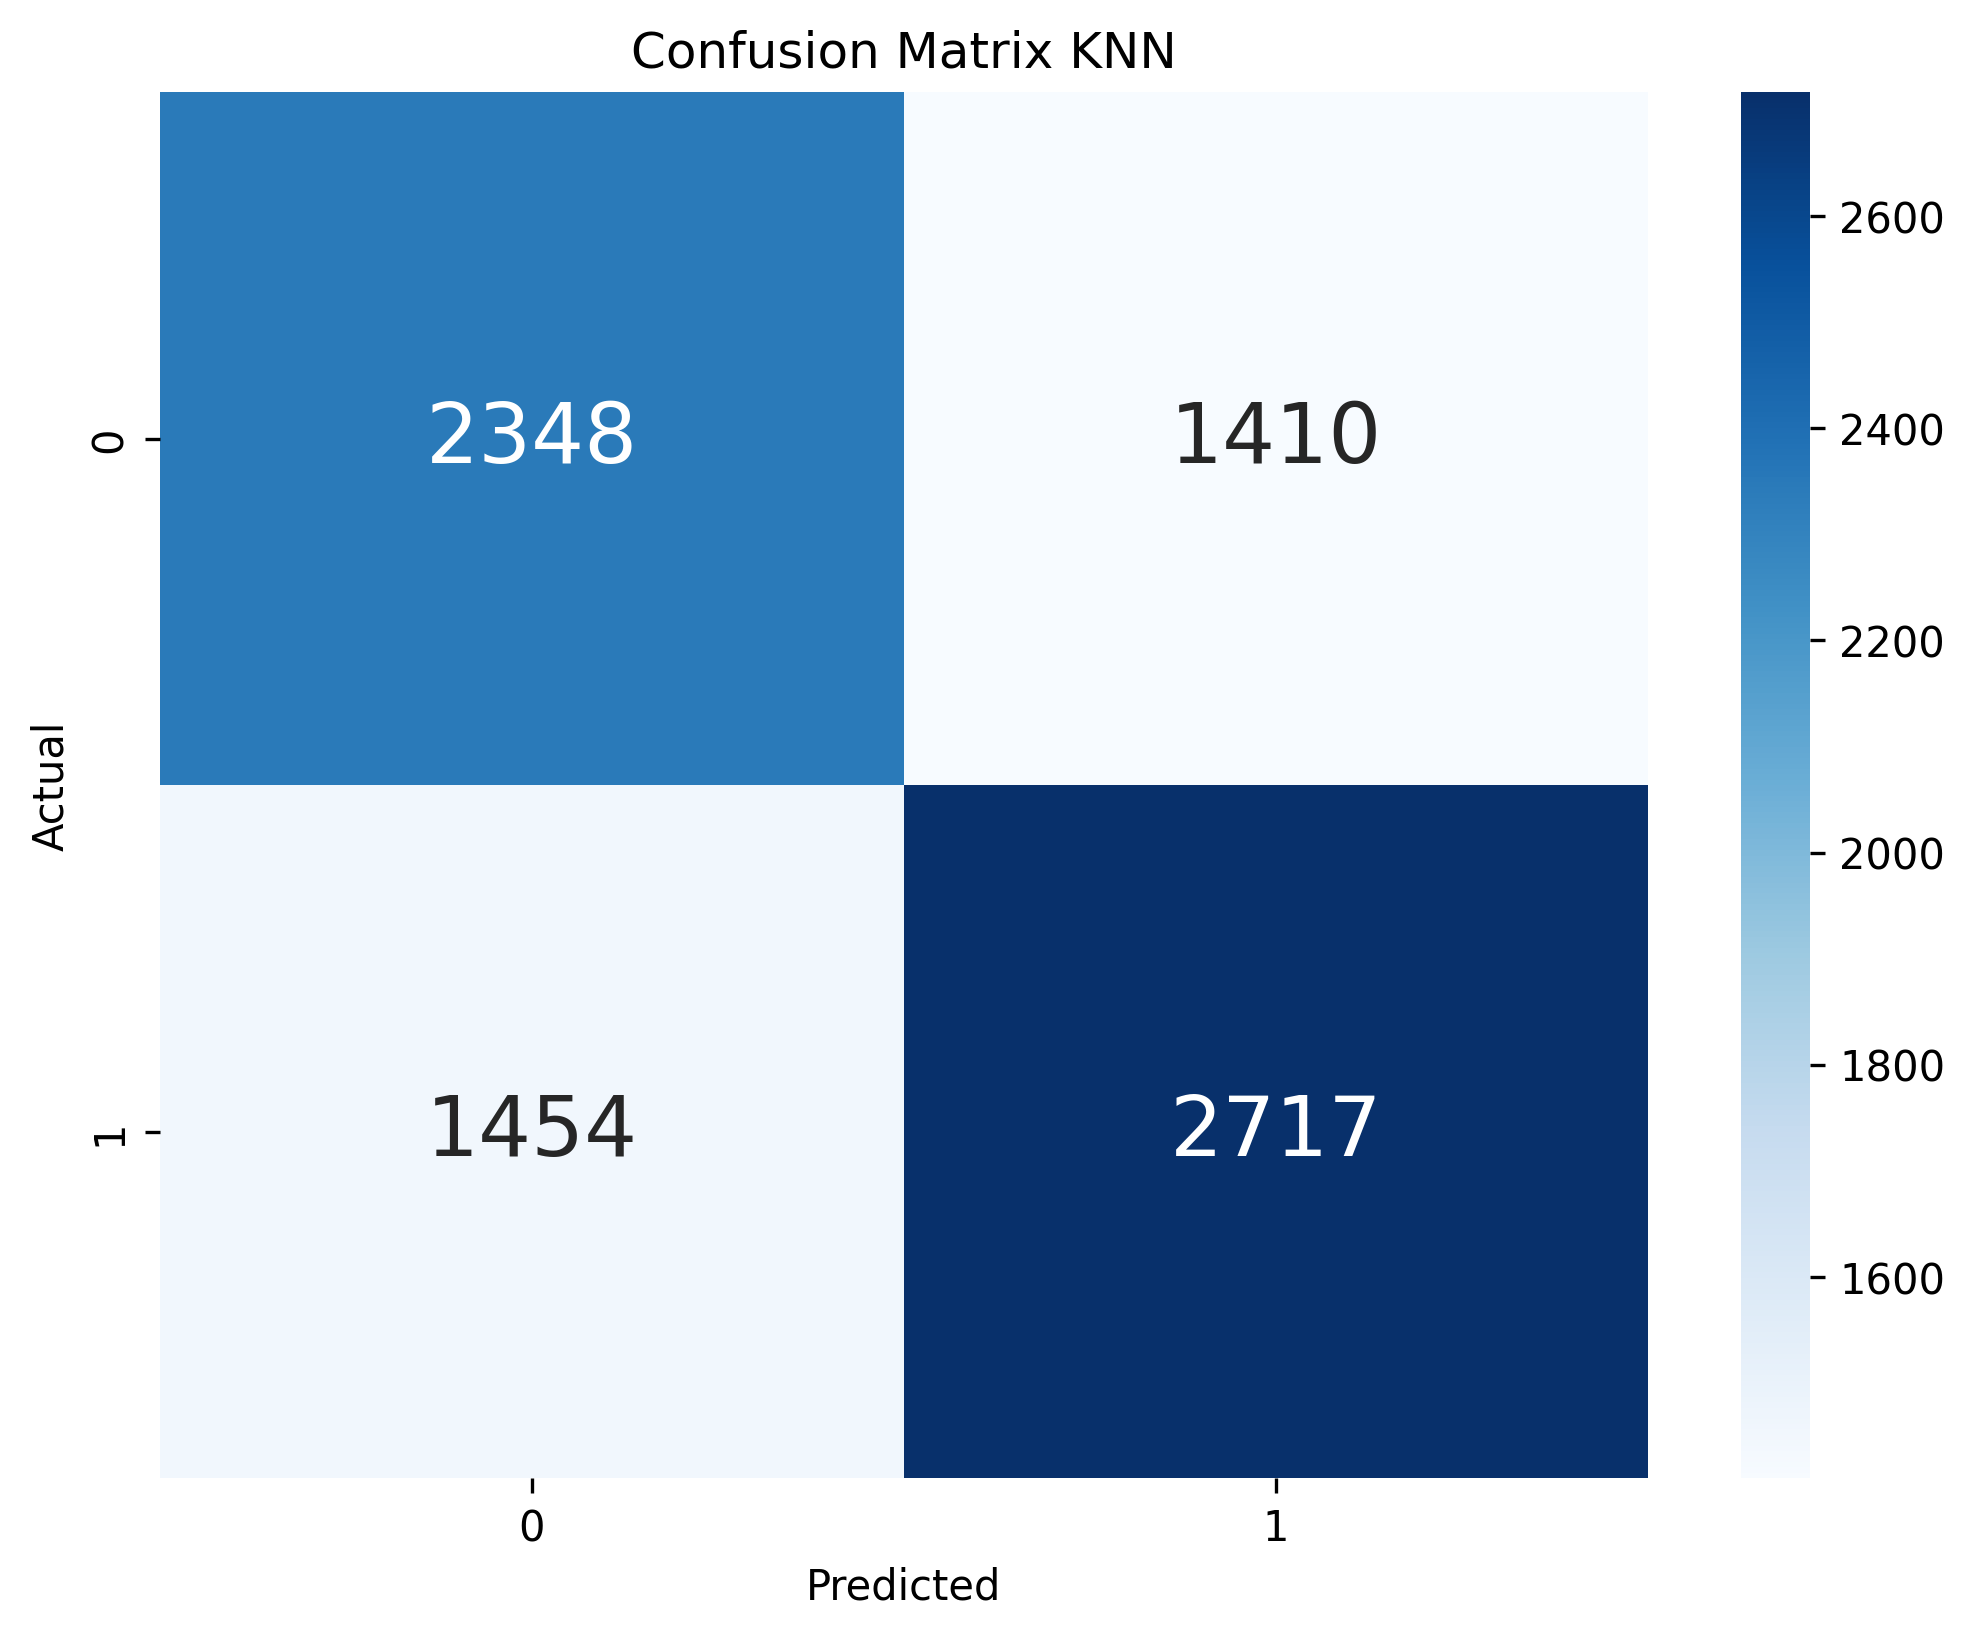

In [31]:
knn = KNeighborsClassifier(n_neighbors= 59)
knn.fit(X_train_stand,y_train)
knn.score(X_train_stand, y_train)

cm = confusion_matrix(y_test, knn.predict(X_test_stand))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),annot_kws={"fontsize": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [32]:
#train Random Forest on partial features
rf_partial = RandomForestClassifier(warm_start=True)
rf_partial.fit(X_train, y_train)
print('Random Forest accuracy on test set (partial features): ', rf_partial.score(X_test, y_test))
print('Random Forest accuracy on train set (partial features): ', rf_partial.score(X_train, y_train))

#calculate the proportion of '1's in the target variable for partial features
targetlist_partial = list(y_test)
print("Proportion of '1's in the test set (partial features): ", targetlist_partial.count(1)/len(targetlist_partial))

Random Forest accuracy on test set (partial features):  0.6665405473578004
Random Forest accuracy on train set (partial features):  1.0
Proportion of '1's in the test set (partial features):  0.5260436372808677


In [33]:
#set up the parameter grid for grid search (partial features)
param_grid_partial = {
    'max_depth': list(range(3, 10)),
    'max_features': list(range(2, len(significant_features) + 1)),  # Adjusted to the number of partial features
    'n_estimators': list(range(5, 25))  # You can expand this range as desired
}

#grid search with cross-validation (partial features)
grid_partial = GridSearchCV(RandomForestClassifier(warm_start=True), param_grid_partial, cv=5)
grid_partial.fit(X_train, y_train)

#display best parameters and scores (partial features)
print("Best parameters for partial features: {}".format(grid_partial.best_params_))
print("Best cross-validation score (partial features): {}".format(grid_partial.best_score_))
print("Test set score (partial features): {}".format(grid_partial.score(X_test, y_test)))

Best parameters for partial features: {'max_depth': 8, 'max_features': 35, 'n_estimators': 20}
Best cross-validation score (partial features): 0.6637133543071465
Test set score (partial features): 0.6570815991928364


In [34]:
rf = RandomForestClassifier(warm_start=True, max_depth = 8, max_features= 8, n_estimators = 20)
rf.fit(X_train_stand, y_train)
rf.score(X_train_stand,y_train)

0.7066910512707322

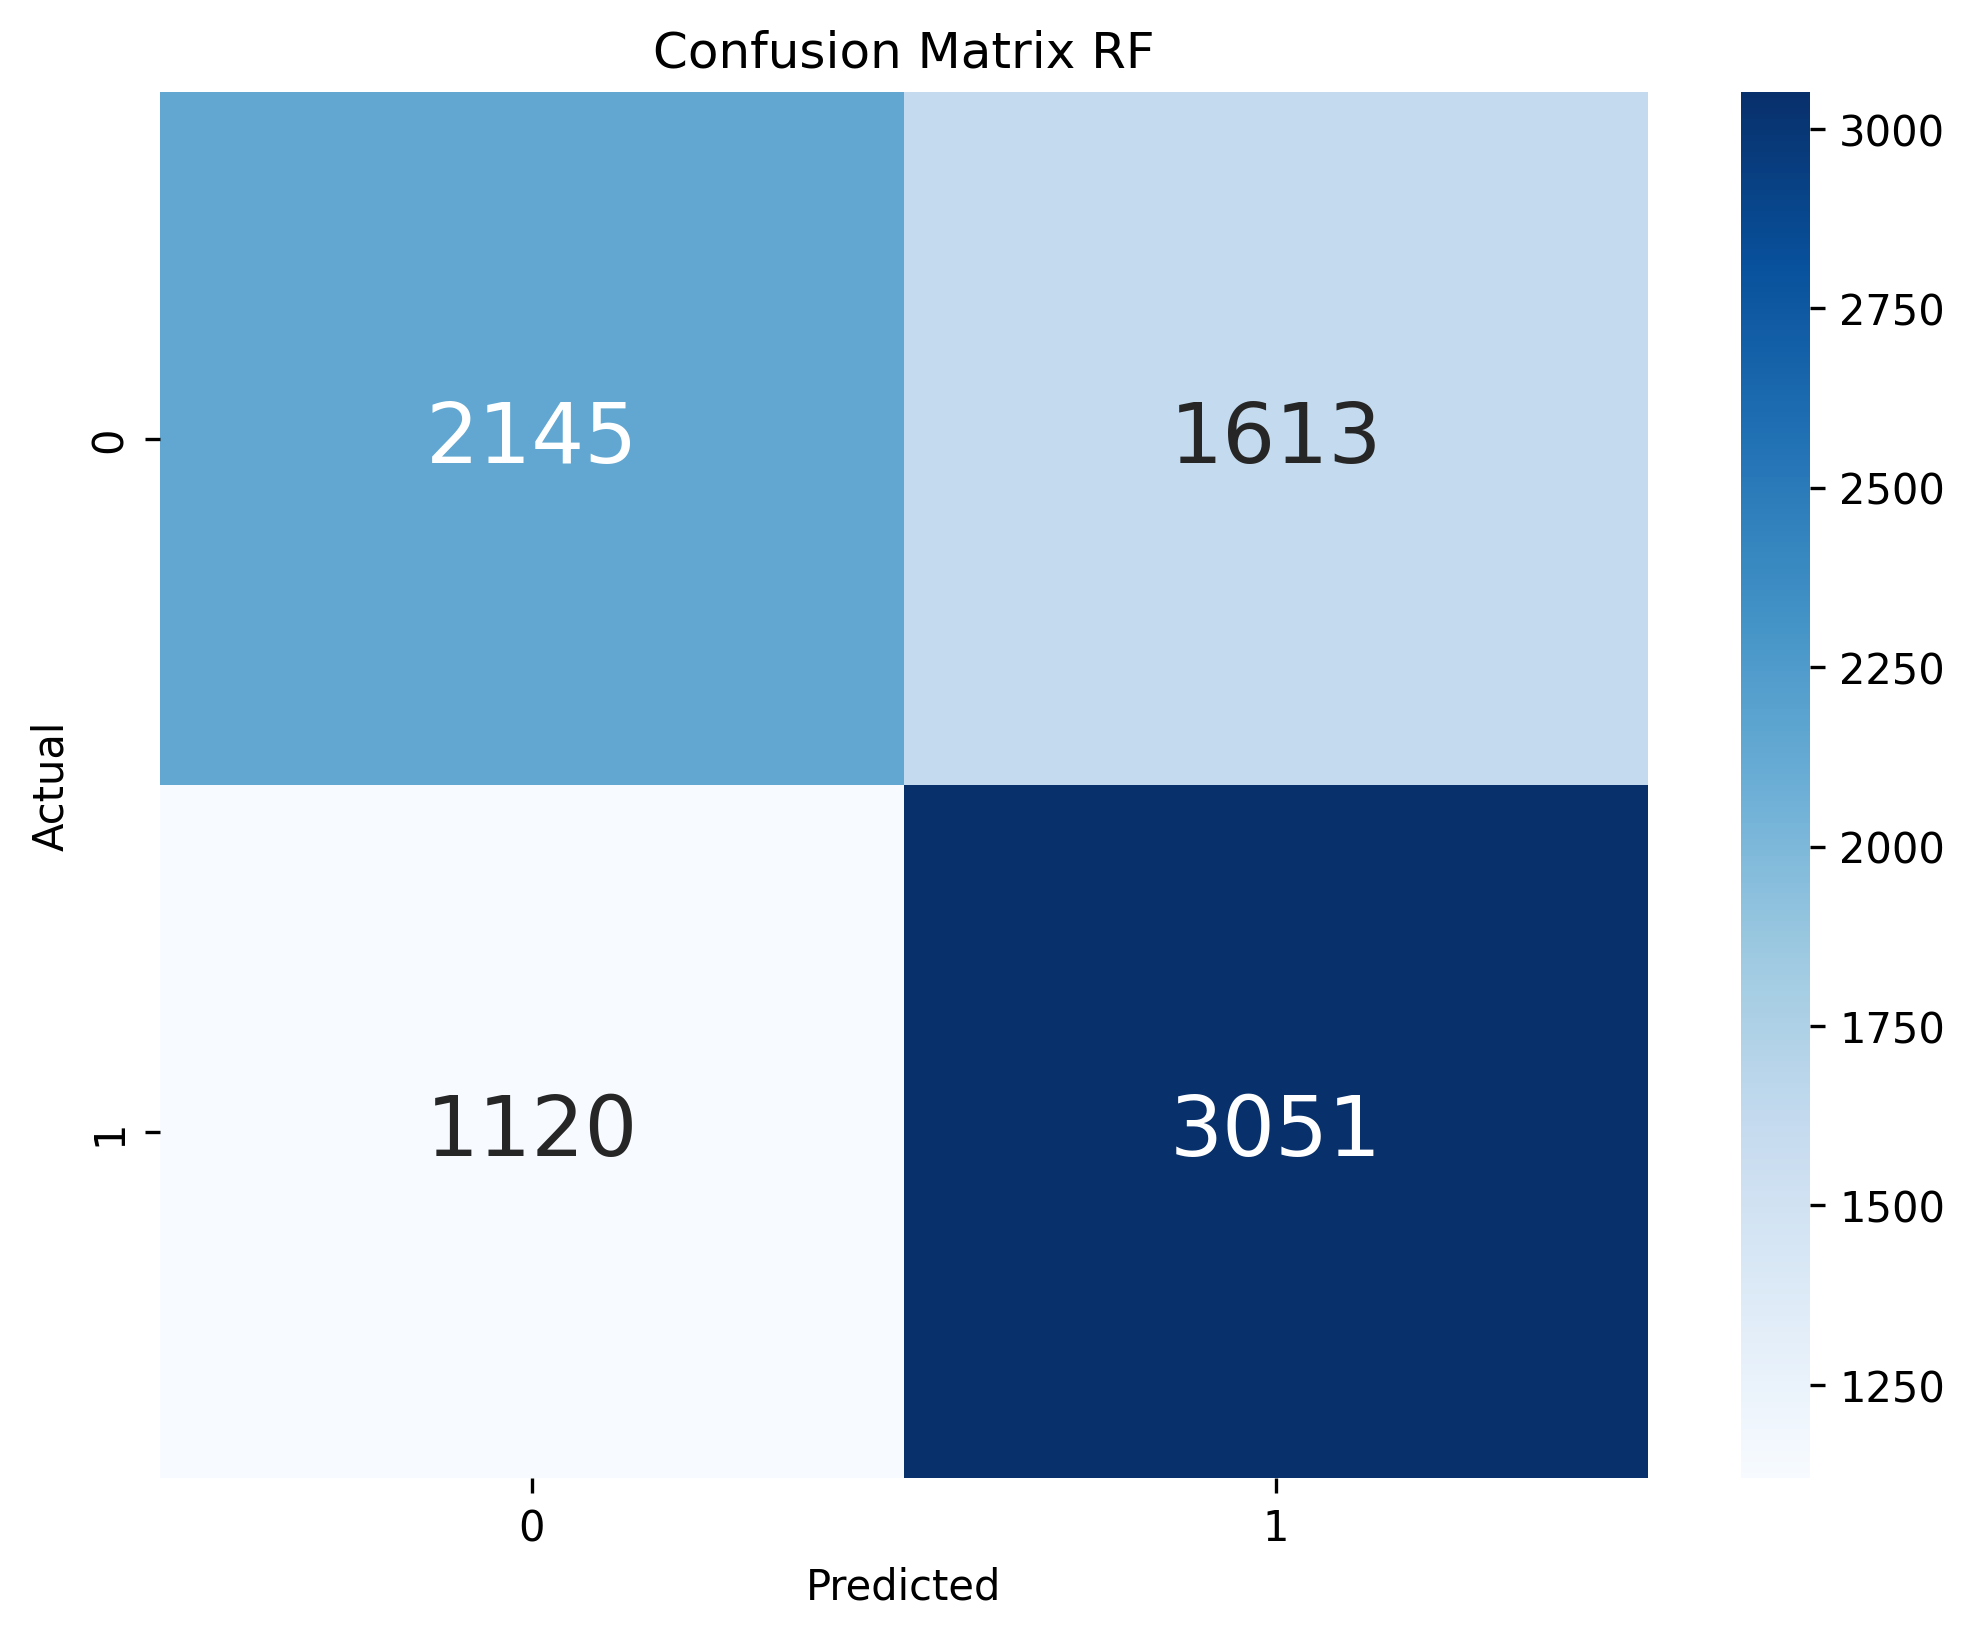

In [35]:
rf = RandomForestClassifier(warm_start=True, max_depth = 8, max_features= 8, n_estimators = 20)
rf.fit(X_train_stand, y_train)

cm = confusion_matrix(y_test, rf.predict(X_test_stand))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),annot_kws={"fontsize": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

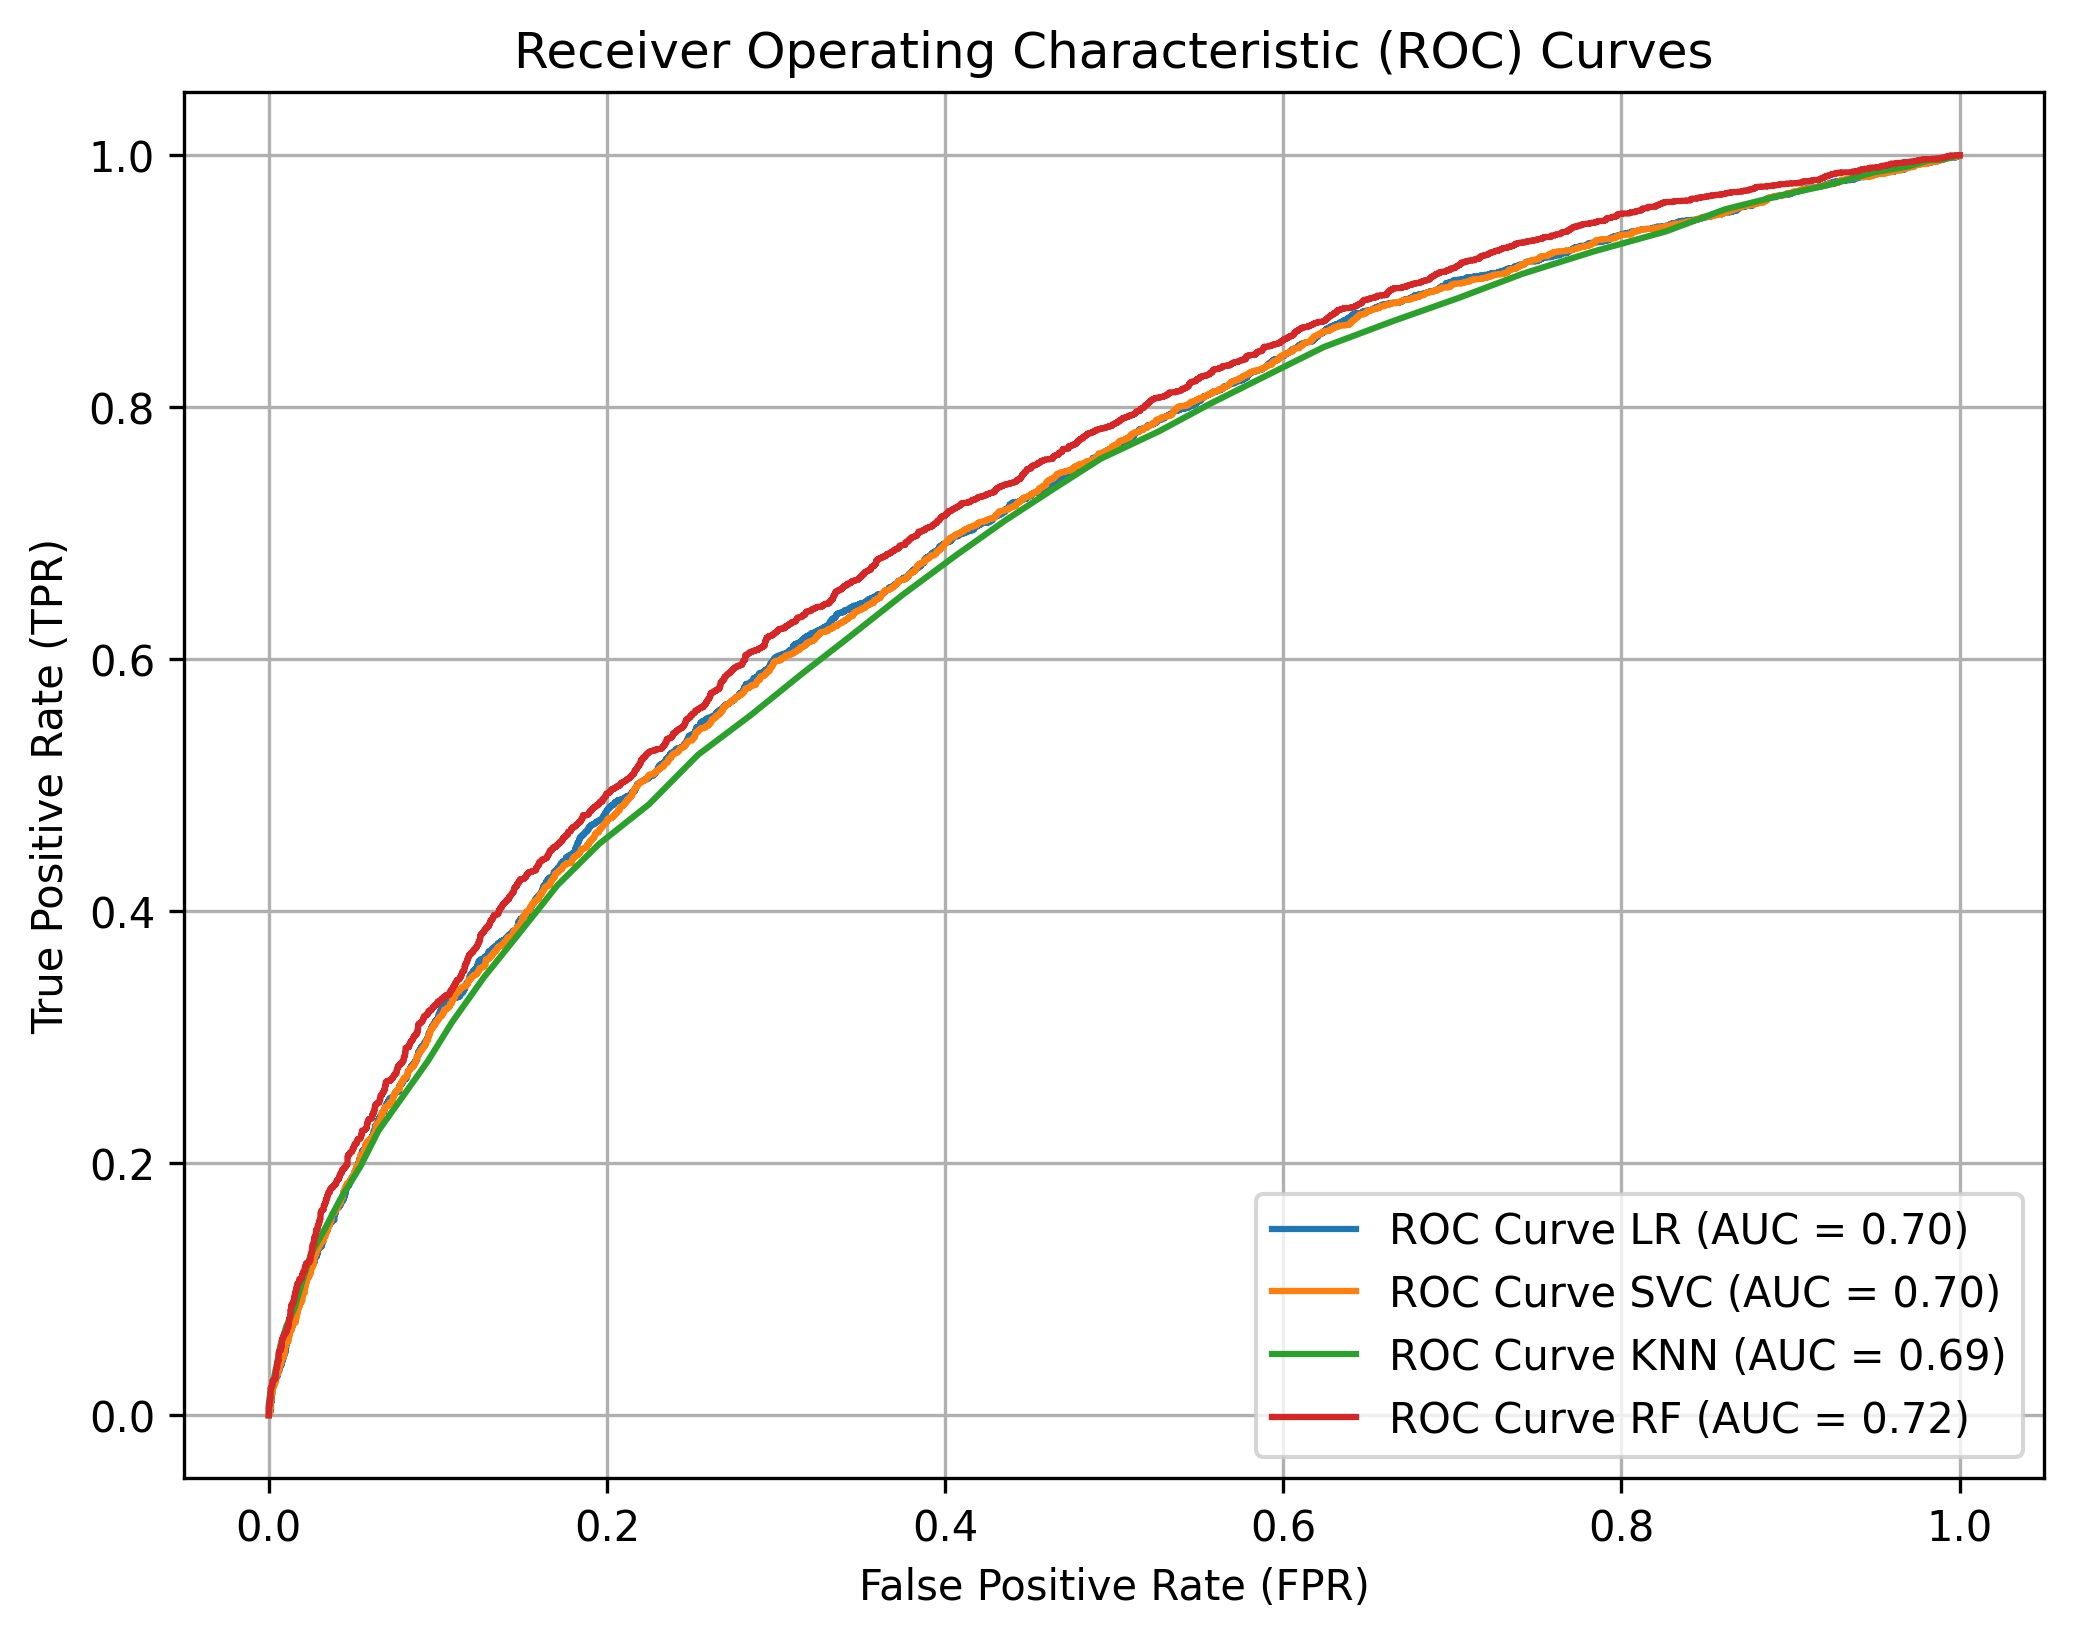

In [36]:
#assume X_train_stand, y_train, X_test_stand, y_test are defined and prepared
lr = LogisticRegression(max_iter=10000, C=0.3455107294592222)
lr.fit(X_train_stand, y_train)

svc = LinearSVC(dual=False, max_iter=10000, C=1)
svc.fit(X_train_stand, y_train)

knn = KNeighborsClassifier(n_neighbors=59)
knn.fit(X_train_stand, y_train)

rf = RandomForestClassifier(warm_start=True, max_depth=8, max_features=8, n_estimators=20)
rf.fit(X_train_stand, y_train)

#calculate ROC and AUC for each classifier
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.decision_function(X_test_stand))
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.decision_function(X_test_stand))
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_stand)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_stand)[:, 1])

#calculate AUC for KNN
auc_knn = auc(fpr_knn, tpr_knn)
auc_lr = auc(fpr_lr, tpr_lr)
auc_svc = auc(fpr_svc, tpr_svc)
auc_rf = auc(fpr_rf, tpr_rf)

#plot ROC curves together
plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label=f"ROC Curve LR (AUC = {auc_lr:.2f})")
plt.plot(fpr_svc, tpr_svc, label=f"ROC Curve SVC (AUC = {auc_svc:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"ROC Curve KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve RF (AUC = {auc_rf:.2f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


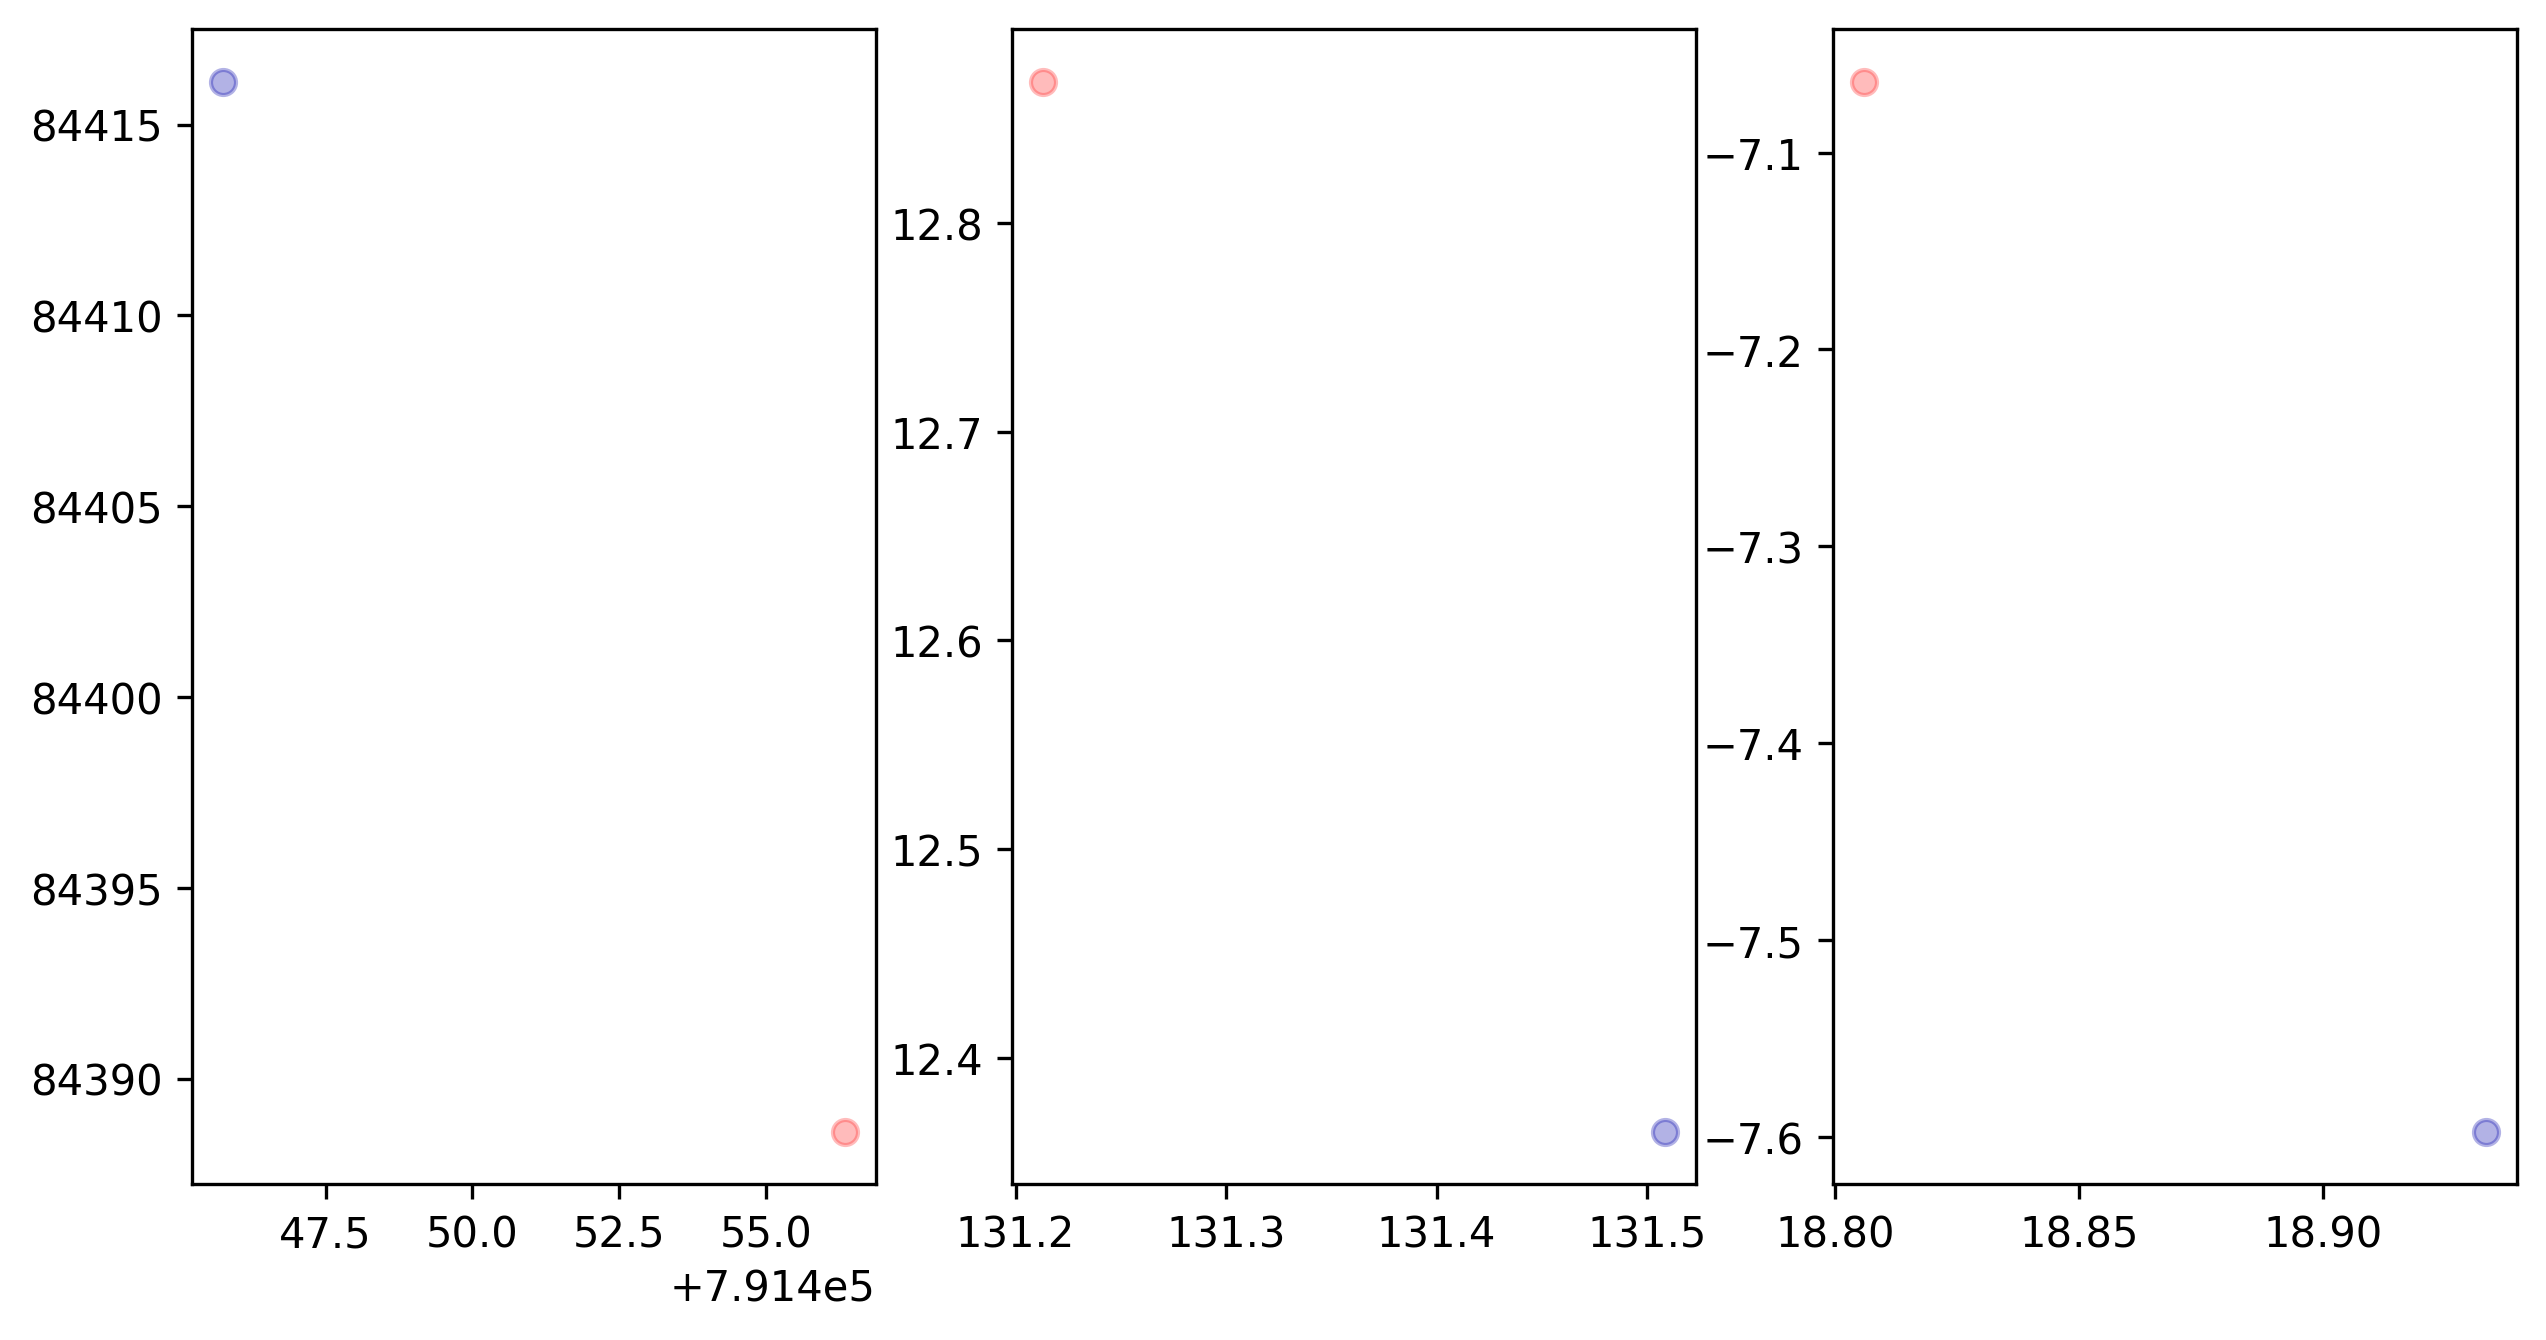

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

pca = PCA(n_components=2)  # 2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))
axes[0].scatter(transformed.loc[1][0], transformed.loc[1][1], label='Class 2', color=mglearn.cm3(1), alpha=0.3)
axes[0].scatter(transformed.loc[0][0], transformed.loc[0][1], label='Class 1', color=mglearn.cm3(0), alpha=0.3)

tsne = TSNE().fit_transform(X)
transformed = pd.DataFrame(tsne)
axes[1].scatter(transformed.loc[1][0], transformed.loc[1][1], label='Class 2', color=mglearn.cm3(0), alpha=0.3)
axes[1].scatter(transformed.loc[0][0], transformed.loc[0][1], label='Class 1', color=mglearn.cm3(1), alpha=0.3)

reducer = UMAP(n_neighbors = 15, min_dist = 0.9)
transformed = pd.DataFrame(reducer.fit_transform(X))
axes[2].scatter(transformed.loc[1][0], transformed.loc[1][1], label='Class 2', color=mglearn.cm3(0), alpha=0.3)
axes[2].scatter(transformed.loc[0][0], transformed.loc[0][1], label='Class 1', color=mglearn.cm3(1), alpha=0.3)

plt.show()

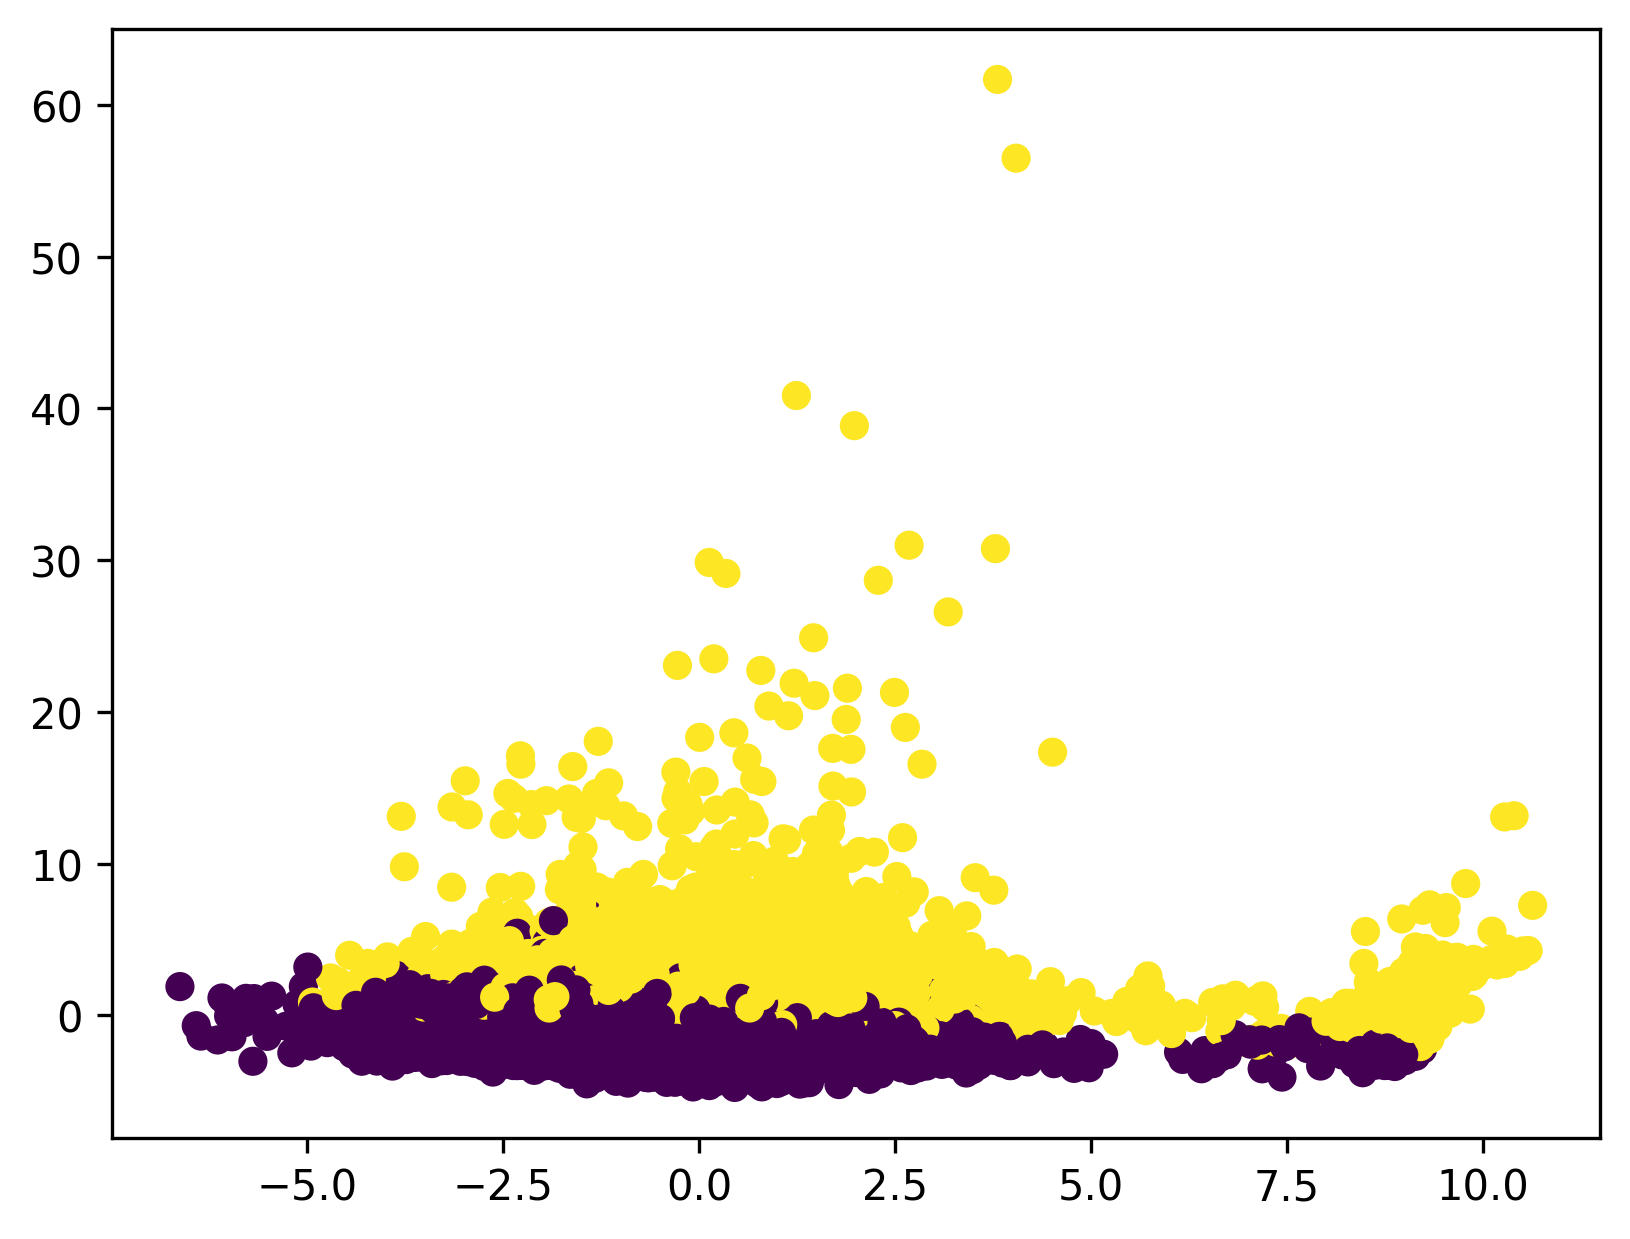

In [46]:
X = StandardScaler().fit_transform(data[significant_features])
km = KMeans(n_clusters=2)
km.fit(X)

pca = PCA(n_components=2)  # 2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))
plt.scatter(transformed[0], transformed[1], c=km.labels_)